# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [39]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style, figure
import mplcyberpunk
# Create two new dataframes

north_df = pd.read_csv("NorthCallCenter.csv")

south_df = pd.read_csv("SouthCallCenter.csv")

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [40]:
# Put your EDA code here

north_reps = len(north_df["Rep ID"].value_counts())
abm_north = north_df["Busy Minutes"].mean()
nrm_north = north_df["Not Ready Minutes"].mean()
icw_north = north_df["Incoming Wait Time"].mean()
dcw_north = north_df["During Call Wait Time"].mean()
call_avg_north = north_df["Time Block"].value_counts()

south_reps = len(south_df["Rep ID"].value_counts())
abm_south = south_df["Busy Minutes"].mean()
nrm_south = south_df["Not Ready Minutes"].mean()
icw_south = south_df["Incoming Wait Time"].mean()
dcw_south = south_df["During Call Wait Time"].mean()
call_avg_south = south_df["Time Block"].value_counts()



### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [41]:
print("NORTH BRANCH:",
     f"\nReps : {north_reps}", f"\nAverage Busy Minutes : {round(abm_north, 2)}",
     f"\nNot Ready Minutes : {round(nrm_north, 2)}", f"\nIncoming Wait Time : {round(icw_north, 2)}",
     f"\nDuring Call Wait Time : {round(dcw_north, 2)}",
     f"\nCalls Taken Per Time Block : \n{call_avg_north}\n")


print("="*50, "\n\nSOUTH BRANCH:",
     f"\nReps : {south_reps}", f"\nAverage Busy Minutes : {round(abm_south, 2)}",
     f"\nNot Ready Minutes : {round(nrm_south, 2)}", f"\nIncoming Wait Time : {round(icw_south, 2)}",
     f"\nDuring Call Wait Time : {round(dcw_south, 2)}",
     f"\nCalls Taken Per Time Block : \n{call_avg_south}\n")

NORTH BRANCH: 
Reps : 9 
Average Busy Minutes : 9.99 
Not Ready Minutes : 1.91 
Incoming Wait Time : 3.05 
During Call Wait Time : 2.97 
Calls Taken Per Time Block : 
12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64


SOUTH BRANCH: 
Reps : 11 
Average Busy Minutes : 10.05 
Not Ready Minutes : 1.91 
Incoming Wait Time : 3.0 
During Call Wait Time : 3.08 
Calls Taken Per Time Block : 
12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64



## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [42]:
# Clean your data here 
# 1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

north_null_icw = north_df[north_df["Incoming Wait Time"].isnull()] 

north_info = north_null_icw["Incoming or Outgoing"].value_counts() 


south_null_icw = south_df[south_df["Incoming Wait Time"].isnull()] 

south_info = south_null_icw["Incoming or Outgoing"].value_counts() 

print(f"{north_info}\n{south_info}")

# as seen above, all places with null incoming wait times correspond to outgoing calls


Outgoing    163
Name: Incoming or Outgoing, dtype: int64
Outgoing    188
Name: Incoming or Outgoing, dtype: int64


In [43]:
# 2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?


# north_df.loc[north_df["Sale"] == "YES "]
# ^remove extra space



new_yes=north_df["Sale"].str.replace("YES ","YES")

north_df["Sale"]=new_yes


north_sales = north_df["Sale"].value_counts()

north_sales

NO     234
YES     11
Name: Sale, dtype: int64

In [44]:
# 3. Are there duplicates in the two data sets? If there are, how did you handle them? 

north_df_dd = north_df.drop_duplicates(keep = "first", inplace = False)

south_df_dd = south_df.drop_duplicates(keep = "first", inplace = False)

print(f"NORTH : Original - {north_df.shape}, Deduplicated - {north_df_dd.shape}") 
print(f"\nSOUTH : Original - {south_df.shape}, Deduplicated - {south_df_dd.shape}")

# this shows (rows, cols) same as before, so there were no duplicates

NORTH : Original - (245, 15), Deduplicated - (245, 15)

SOUTH : Original - (314, 15), Deduplicated - (314, 15)


 ### Cleaning Data Results
    
 Make note of your results!
 1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?<br />
 Yes - I used .isnull() to look at the part of the dataframe with no "Incoming Wait Time", then viewed the value_counts() of
 "Incoming or Outgoing" to verify that all values were Outgoing.<br /><br />
 
 
 2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?<br />
 The other "Yes" value had an extra space and therefore was grouped differently from the others. To rectify this, I removed the extra space.<br /><br />
 
 3. Are there duplicates in the two data sets? If there are, how did you handle them?<br />
 No, the .shape of the dataframe is the same before and after deduplicating.<br /><br />
 
 4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?<br />
 There are some features (e.g. 'Sale') that are not used in the analysis questions, but I did not drop them. I chose to keep all data in case it was useful to later analysis.<br /><br />

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [45]:
# combine the two datasets together to create a third dataframe called df

df = north_df.append(south_df)

In [46]:
# Manipulate data here
# Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

df_rep_id = df.groupby(["Rep ID", "Branch"]).aggregate(func="sum")

calls_sorted = df_rep_id.sort_values(by="Calls", ascending = False)

calls_sorted

# .groupby() with "Rep ID" and "Branch" shows Brent (North) and Eric (South) have highest number of calls

,,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,Branch,,,,,,,,
Brent,North,4840,0,1,362,71,17.0,117,37
Eric,South,5039,0,0,361,54,47.0,112,35
Randy,South,4576,3,1,320,66,47.0,98,33
Sandy,South,4694,1,0,325,60,34.0,100,32
Helga,South,5236,0,2,292,58,36.0,95,31
Lilly,North,3375,0,2,307,59,37.0,88,30
Todd,North,4252,1,0,296,58,21.0,97,29
Duke,North,2999,2,0,292,56,39.0,85,29
George,South,4620,0,0,298,53,41.0,87,29


In [47]:
# What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

call_abd_whole = (df["Abandoned"].sum()/df["Calls"].sum()) * 100

call_abd_north = (north_df["Abandoned"].sum()/north_df["Calls"].sum()) * 100

call_abd_south = (south_df["Abandoned"].sum()/south_df["Calls"].sum()) * 100



print("Average Call Abandonment Rate\n",
      f"\nWHOLE COMPANY : {round(call_abd_whole, 2)} %\n",
      f"\nNORTH BRANCH : {round(call_abd_north, 2)} %\n",
     f"\nSOUTH BRANCH : {round(call_abd_south, 2)} %\n") 

Average Call Abandonment Rate
 
WHOLE COMPANY : 1.97 %
 
NORTH BRANCH : 2.86 %
 
SOUTH BRANCH : 1.27 %



In [48]:
# What is the percentage of calls answered within 2 seconds for each company and the entire company?

low_iwt = df[df["Incoming Wait Time"] <= 2.0]
pctg_df = round(len(low_iwt["Incoming Wait Time"])/len(df["Incoming Wait Time"]) * 100, 2)

low_iwt_north = north_df[north_df["Incoming Wait Time"] <= 2.0]
pctg_df_north = round(len(low_iwt_north["Incoming Wait Time"])/len(north_df["Incoming Wait Time"]) * 100, 2)

low_iwt_south = south_df[south_df["Incoming Wait Time"] <= 2.0]
pctg_df_south = round(len(low_iwt_south["Incoming Wait Time"])/len(south_df["Incoming Wait Time"]) * 100, 2)


print("Percentage Of Calls Answered Within 2 Seconds\n",
     f"\nWHOLE COMPANY : {pctg_df} %\n",
     f"\nNORTH BRANCH : {pctg_df_north} %\n",
     f"\nSOUTH BRANCH : {pctg_df_south} %")

Percentage Of Calls Answered Within 2 Seconds
 
WHOLE COMPANY : 14.49 %
 
NORTH BRANCH : 13.47 %
 
SOUTH BRANCH : 15.29 %


In [49]:
# For each branch and the entire company, what is the average speed of answer?

avg_speed_df = df["Incoming Wait Time"].mean()
avg_speed_north = north_df["Incoming Wait Time"].mean()
avg_speed_south = south_df["Incoming Wait Time"].mean()

print("Average Speed Of Answer (Seconds)\n",
     f"\nWHOLE COMPANY : {round(avg_speed_df, 2)}\n",
     f"\nNORTH BRANCH : {round(avg_speed_north, 2)}\n",
     f"\nSOUTH BRANCH : {round(avg_speed_south, 2)}")

Average Speed Of Answer (Seconds)
 
WHOLE COMPANY : 3.02
 
NORTH BRANCH : 3.05
 
SOUTH BRANCH : 3.0


### Data Manipulation Results <br />
1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls. <br />
Brent (North Branch) has 37 calls. Eric (South Branch) has 35 calls. <br />

2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?<br />
North Branch has call abandonment rate of 2.86 %. South Branch has a much lower abandonment rate of 1.27 %. Company-wide call abandonment rate is 1.97 %.

3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?<br />
Most calls are answered after the ideal time frame - North Branch answers only 13.47 % calls within 2 seconds, and South Branch answers 15.29% within 2 seconds. Company-wide rate is 14.49 %.
4. For each branch and the entire company, what is the average speed of answer?<br />
Average speed of answer (in seconds) is roughly similar between North (3.05) and South (3.0), and company-wide (3.02).

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}


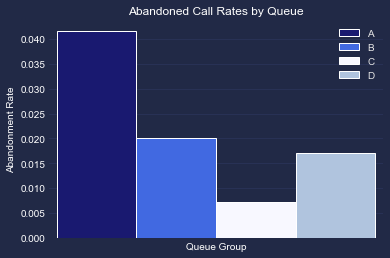

In [50]:
# Create visualization 1 here - What is the average abandonment rate per queue?
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] # sets key : value pairs for abandonment_rates
    # abandonment rate = abandoned/total calls
    
print(abandonment_rates)

style.use('cyberpunk')
df_bar = pd.DataFrame(abandonment_rates, index = [0])

ax = df_bar.plot.bar(width = 10, color = ['midnightblue', 'royalblue', 'ghostwhite', 'lightsteelblue'], edgecolor = "white")
plt.title('Abandoned Call Rates by Queue', color = 'white')
plt.xlabel("Queue Group", color = 'white')
plt.ylabel('Abandonment Rate', color = 'white')
plt.xticks([])
plt.yticks(color = 'white')
plt.savefig('bar_vertical.png')

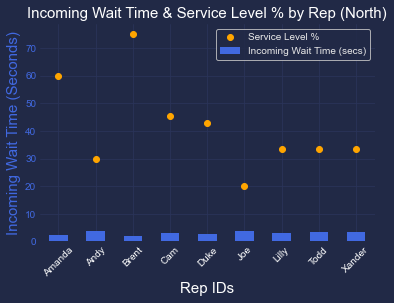

AVERAGE SERVICE LEVEL
 
North Branch : 41.48 %
 
South Branch : 36.2 %



In [51]:
# Create visualization 2 here - What is the service level and average speed of answer per each rep?
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index() 
south_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index() 


# groupby() rep id, then look at each rep's "incoming wait time" column 
# then .mean()  take its^ mean
# then to_frame() convert ^that series to a dataframe
# then reset index, use default index
# north_plt is a dataframe containing {'rep_id' : 'avg incoming wait time'}
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0] # quick_calls = north_df with subset of calls where "incoming wait time" <= 2 secs
quick_reps = quick_calls[["Rep ID", "Calls"]] # quick_reps = quick_calls with just 'rep id' and 'calls'
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table - group by rep id to see # calls <= 2 secs incoming wait time


quick_calls_south = south_df[south_df["Incoming Wait Time"] <= 2.0] 
quick_reps_south = quick_calls_south[["Rep ID", "Calls"]] 
quick_stats_south = quick_reps_south.groupby(["Rep ID"]).sum() 


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"] # total calls = subset of north_df where "Incoming"
rep_calls = total_calls_in[["Rep ID", "Calls"]]     # rep calls = total calls dataframe with just rep id and incoming 'calls'
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  - group by rep id to see # incoming calls

total_calls_in_south = south_df[south_df["Incoming or Outgoing"] == "Incoming"] 
rep_calls_south = total_calls_in_south[["Rep ID", "Calls"]]     
total_stats_south = rep_calls_south.groupby(["Rep ID"]).sum()


#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID") # merges above two dataframes into one
service_level_south = pd.merge(quick_stats_south, total_stats_south, on="Rep ID")
# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100 
service_level_south["Service Level %"] = service_level_south["Calls_x"]/service_level_south["Calls_y"] * 100 

north_sl_avg = service_level["Service Level %"].mean()
south_sl_avg = service_level_south["Service Level %"].mean()


north_plt_service = pd.merge(north_plt, service_level[["Service Level %"]], on = "Rep ID")
south_plt_service = pd.merge(south_plt, service_level_south[["Service Level %"]], on = "Rep ID")

north_plt_vis = north_plt.plot(kind = 'bar', color = 'royalblue', ylabel = "incoming wait time")
x = range(len(north_plt['Rep ID']))
y = plt.scatter(x = north_plt['Rep ID'], y = service_level["Service Level %"], color = "orange")
y2 = north_plt['Incoming Wait Time']

labels = north_plt['Rep ID']
plt.title('Incoming Wait Time & Service Level % by Rep (North)', color = "white", fontsize = 15)
plt.legend(['Service Level %', 'Incoming Wait Time (secs)'], loc = 1, frameon = True)
plt.xticks(x, labels, color = 'white', rotation = 45)
plt.yticks(color = 'royalblue')
plt.xlabel('Rep IDs', color = 'white', fontsize = 15)
plt.savefig('bar_vertical.png')
plt.ylabel('Incoming Wait Time (Seconds)', color = 'royalblue', fontsize = 15)
plt.show()

print("AVERAGE SERVICE LEVEL\n",
     f"\nNorth Branch : {round(north_sl_avg, 2)} %\n",
     f"\nSouth Branch : {round(south_sl_avg, 2)} %\n")

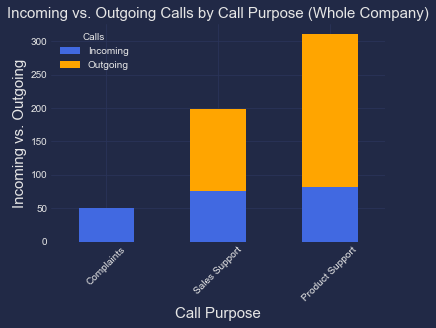


Incoming vs. Outgoing Calls (Whole Company)
 
COMPLAINTS : 51 Incoming, None Outgoing
 
SALES SUPPORT : 75 Incoming, 123 Outgoing
 
PRODUCT SUPPORT : 82 Incoming, 228 Outgoing



In [52]:
# Create visualization 3 here - For each type of call purpose, how many calls are outgoing vs. incoming?
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

complaints = df[df["Call Purpose"] == "Complaint"]
sales_support = df[df["Call Purpose"] == "Sales Support"]
product_support = df[df["Call Purpose"] == "Product Support"]

# complaints["Incoming or Outgoing"].value_counts() 
# sales_support["Incoming or Outgoing"].value_counts()
# product_support["Incoming or Outgoing"].value_counts()

comp_o = None #running value_counts() above let me know that 'Complaints' has no outgoing calls, just one value at index [0]
comp_i = complaints["Incoming or Outgoing"].value_counts()[0] 

ss_o = sales_support["Incoming or Outgoing"].value_counts()[0]
ss_i = sales_support["Incoming or Outgoing"].value_counts()[1]

ps_o = product_support["Incoming or Outgoing"].value_counts()[0]
ps_i = product_support["Incoming or Outgoing"].value_counts()[1]


# i chose a stacked bar chart to show incoming vs. outgoing composition for each call purpose type

df_purposes = pd.DataFrame(columns=["Calls", "Complaints", "Sales Support","Product Support"], 
                  data=[["Incoming", comp_i, ss_i, ps_i],
                        ["Outgoing", comp_o, ss_o, ps_o],
                        ])
df_purposes.set_index('Calls').T.plot(kind='bar', stacked=True, color = ['royalblue', 'orange'])
#Adding the aesthetics
plt.title('Incoming vs. Outgoing Calls by Call Purpose (Whole Company)', fontsize = 15)
plt.xticks(rotation = 45)
plt.xlabel('Call Purpose', fontsize = 15)
plt.ylabel('Incoming vs. Outgoing', fontsize = 15) 
# Show the plot
plt.show()

print("\nIncoming vs. Outgoing Calls (Whole Company)\n",
     f"\nCOMPLAINTS : {comp_i} Incoming, {comp_o} Outgoing\n",
     f"\nSALES SUPPORT : {ss_i} Incoming, {ss_o} Outgoing\n",
     f"\nPRODUCT SUPPORT : {ps_i} Incoming, {ps_o} Outgoing\n")

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

    To visualize 'average abandonment rate per queue', I chose a bar chart with color-coded queues bars on x-axis and abandonment rates on y-axis.
    I chose this because I wanted to compare abandonment rates across all four queues, with different colors for each queue to aid in visual comparison.


    To visualize 'service level and average speed of answer per each rep', I chose two different graph types for visual contrast - scatter plot for 
    service level % and bar chart for average speed of answer. I wanted to show the correlation/relationship between service service level and 
    average speed of answer, and the graph reveals an inverse correlation - reps with lower service levels have higher incoming wait times. 
    The heatmap below also shows a strong (-.95) correlation between service level and average speed of answer.


    To visualize how many calls are outgoing vs. incoming for each call purpose, I chose a color-coded stacked bar chart. This helps viewers compare the 
    composition of different call types.

<AxesSubplot:>

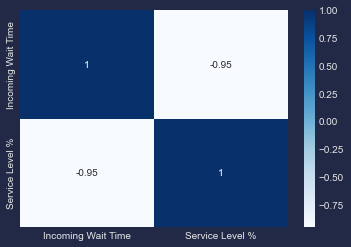

In [53]:
sb.heatmap(north_plt_service.corr(), annot = True, cmap = "Blues")

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

1. Although the North Branch has higher service levels (41.48 %, as opposed to 36.2 % at South Branch), overall call abandonment rates are higher at the North Branch (2.86 %, as opposed to 1.87 % at South Branch). The North Branch also has a lower percentage of calls answered within 2 seconds, at 13.47 %. Overall, KPIs indicate the South Branch is operating more efficiently.

2. South Branch has 11 reps and North only has 9. The KPIs indicate that the North Branch would benefit from extra help.

3. Customer satisfaction - after calls, customers should have the opportunity to fill out a survey indicating how satisfied they were with the service. A column containing a numeric customer satisfaction rating (e.g. 0 for 'highly dissatisfied' to 5 for 'highly satsfied') for each call would be useful.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [54]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
call_purposes = ['Complaint', 'Sales Support', 'Product Support']
# Use groupby to plot based on time blocks:

call_times_grouped = call_times.groupby(["Time Block", "Call Purpose"])
# Use groupby and get_group to select which call purpose to plot:

In [55]:
# ctg_sum = call_times_grouped.aggregate(func="sum")
# ctg_sum

In [56]:
time_list = []
for time in call_times["Time Block"]:
    if time not in time_list:
        time_list.append(time)
        
time_list.sort()
time_list.insert(0, time_list.pop()) #this arranges the list in order 9am - 5pm
        

In [57]:
c_totals = []
ss_totals = []
ps_totals = []

for time in time_list:
    df_test = df[df["Time Block"] == time]
    df_test = df_test[df_test["Call Purpose"] == "Complaint"]
    c_totals.append(df_test["Calls"].sum())
    
for time in time_list:
    df_test = df[df["Time Block"] == time]
    df_test = df_test[df_test["Call Purpose"] == "Sales Support"]
    ss_totals.append(df_test["Calls"].sum())
    
for time in time_list:
    df_test = df[df["Time Block"] == time]
    df_test = df_test[df_test["Call Purpose"] == "Product Support"]
    ps_totals.append(df_test["Calls"].sum())

In [58]:
df_times = pd.DataFrame({"Time Block" : time_list,
                        "Complaints" : c_totals,
                        "Sales Support" : ss_totals,
                        "Product Support" : ps_totals})
df_times = df_times.set_index("Time Block")

In [59]:
df_times

,Complaints,Sales Support,Product Support
Time Block,,,
9:00 AM,5,0,5
10:00 AM,6,73,20
11:00 AM,3,27,26
12:00 PM,11,49,60
1:00 PM,6,18,16
2:00 PM,5,10,50
3:00 PM,6,6,61
4:00 PM,3,10,40
5:00 PM,6,5,32


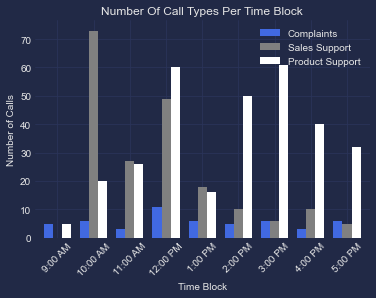

In [60]:
ax = df_times.plot.bar(rot=45, color = ['royalblue', 'gray', 'white'], width = .75, ylabel = "Number of Calls", title = "Number Of Call Types Per Time Block")